In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
X_train = X_train / 255.0
X_test = X_test / 255.0


In [5]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for the output layer
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
history = model.fit(X_train, y_train, epochs=5, validation_split=0.1)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 49s 28ms/step - accuracy: 0.7721 - loss: 0.6335 - val_accuracy: 0.8767 - val_loss: 0.3381
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 80s 27ms/step - accuracy: 0.8857 - loss: 0.3164 - val_accuracy: 0.8852 - val_loss: 0.3154
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 28ms/step - accuracy: 0.8986 - loss: 0.2687 - val_accuracy: 0.8965 - val_loss: 0.2677
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 45s 27ms/step - accuracy: 0.9134 - loss: 0.2320 - val_accuracy: 0.9002 - val_loss: 0.2704
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 84s 28ms/step - accuracy: 0.9249 - loss: 0.2002 - val_accuracy: 0.8877 - val_loss: 0.3090
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8799 - loss: 0.3355
Test Accuracy: 0.88


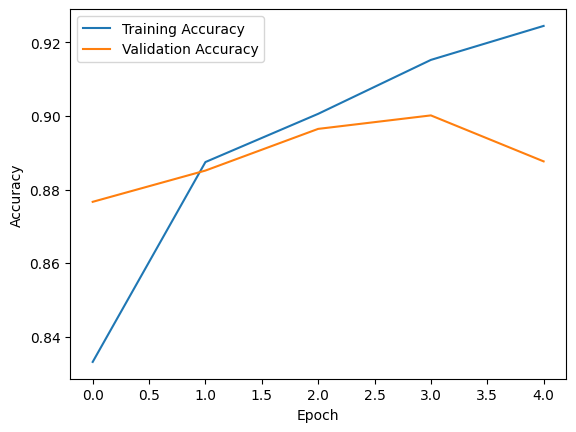

In [9]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [10]:
predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [13]:

def plot_sample(index):
    plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
    predicted_label = predictions[index].argmax()  # Get the predicted class index
    true_label = y_test[index]  # Get the true label
    plt.title(f"Predicted: {class_names[predicted_label]}, True: {class_names[true_label]}")
    plt.axis('off')
    plt.show()

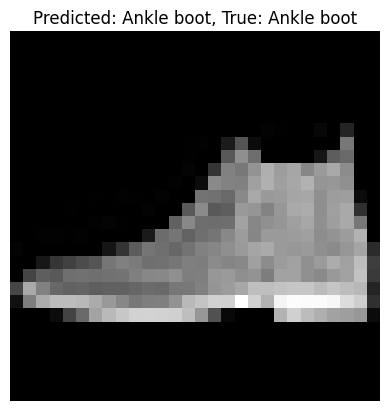

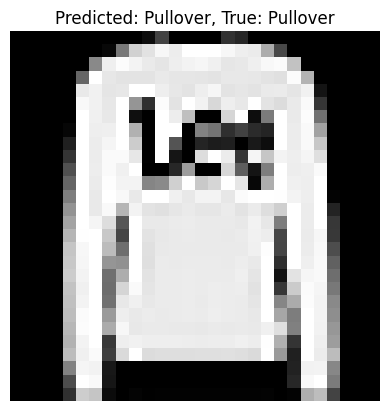

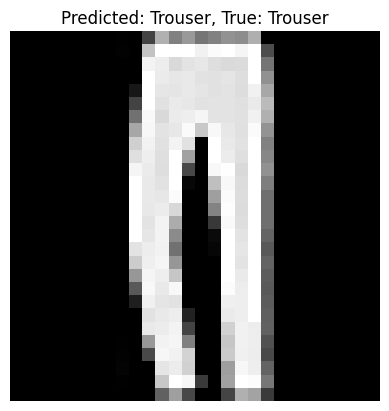

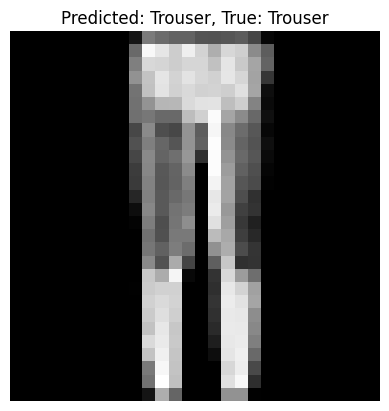

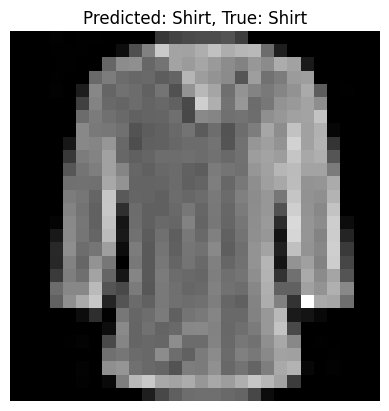

In [14]:
for i in range(5):
    plot_sample(i)